In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2025-05-08 19:04:51.698145: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 19:04:51.766649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-08 19:04:51.767217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-08 19:04:51.768578: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-08 19:04:51.777633: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 19:04:51.778905: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

data = pd.read_csv(url, header=None, names=columns)

In [3]:
# Display first 5 rows
print("Dataset Head:")
print(data.head())
print("\nDataset shape:", data.shape)

Dataset Head:
  letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0      T      2      8      3     5      1      8     13      0      6      6   
1      I      5     12      3     7      2     10      5      5      4     13   
2      D      4     11      6     8      6     10      6      2      6     10   
3      N      7     11      6     6      3      5      9      4      6      4   
4      G      2      1      3     1      1      8      6      6      6      6   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0     10      8      0      8      0      8  
1      3      9      2      8      4     10  
2      3      7      3      7      3      9  
3      4     10      6     10      2      8  
4      5      9      1      7      5     10  

Dataset shape: (20000, 17)


In [4]:
# Preprocessing
label_encoder = LabelEncoder()
data['letter'] = label_encoder.fit_transform(data['letter'])

X = data.drop('letter', axis=1)
y = data['letter']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# Build DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/50
400/400 [==============================] - 2s 2ms/step - loss: 1.5610 - accuracy: 0.5854 - val_loss: 0.9181 - val_accuracy: 0.7456
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.7400 - accuracy: 0.7878 - val_loss: 0.6521 - val_accuracy: 0.8100
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5586 - accuracy: 0.8369 - val_loss: 0.5251 - val_accuracy: 0.8413
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4529 - accuracy: 0.8683 - val_loss: 0.4380 - val_accuracy: 0.8716
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8888 - val_loss: 0.3905 - val_accuracy: 0.8847
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.9045 - val_loss: 0.3374 - val_accuracy: 0.8994
Epoch 7/50
400/400 [==============================] - 1s 2ms/step - loss: 0.2850 - accuracy: 0.9172 - val_loss: 0.3131 - val_accuracy: 0.9041
Epoch 

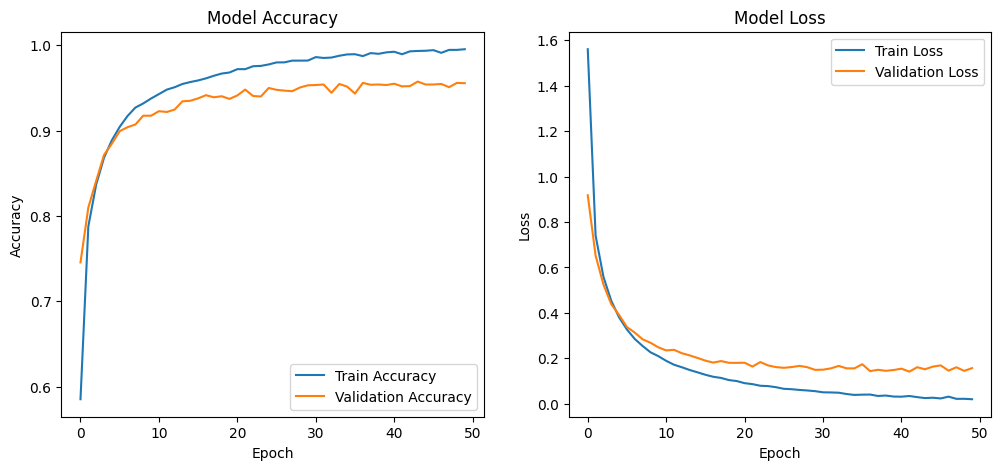

In [9]:
# After training the model (history object returned by model.fit)
# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

125/125 [==============================] - 0s 3ms/step - loss: 0.1727 - accuracy: 0.9540

Test Accuracy: 0.9540


In [11]:
# Save model and preprocessing objects
model.save('letter_classifier.h5')
import joblib
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

/root/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['label_encoder.joblib']

In [12]:
# Test with new input (example from dataset)
test_sample = np.array([[6,5,4,5,7,5,12,6,7,4,5,10,6,2,4,1]]).astype('float32')
test_sample_scaled = scaler.transform(test_sample)
prediction = model.predict(test_sample_scaled)
predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])

print(f"\nPredicted letter: {predicted_class[0]}")

/root/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
1/1 [==============================] - 0s 163ms/step

Predicted letter: M


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8365eab-db7b-47eb-a47e-443fcca51d5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>